In [1]:
import sys,os
from astropy import units as un, constants as cons
sys.path.append('/home/jonathan/Dropbox/jonathanmain/CGM/rapidCoolingCGM/published_pysrc')
os.chdir('/home/jonathan/Dropbox/jonathanmain/CGM/rapidCoolingCGM/published_pysrc')
import cooling_flow as CF

#### define potential

In [3]:
import HaloPotential as Halo
lMhalo = 11.5
z = 0.
Mgalaxy = Halo.MgalaxyBehroozi(lMhalo, z)
potential = Halo.DK14_NFW(lMhalo,Mgalaxy,z)

AttributeError: module 'HaloPotential' has no attribute 'MgalaxyBehroozi'

#### define cooling function

In [9]:
import WiersmaCooling as Cool
Z2Zsun = 1/3.
z = 0.
cooling = Cool.Wiersma_Cooling(Z2Zsun,z)

/home/jonathan/Dropbox/jonathanmain/CGM/rapidCoolingCGM/published_pysrc/WiersmaCooling.py:40: RuntimeWarning: invalid value encountered in log10
  vals = log(self.LAMBDA(X*un.K,Y*un.cm**-3).value)


## integrate solution without angular momentum

In [4]:
Rvir = potential.rvir()
R_sonic = 3.*un.kpc         #radius of sonic point
R_min = 0.1*un.kpc           #inner radius of supersonic part of solution
R_max = 7.*Rvir              #outer radius of integration
max_step = 0.01              #resolution of solution in ln(r)

In [5]:
res_noAM = CF.shoot_from_sonic_point(potential,cooling,R_sonic,R_max,R_min,max_step=max_step)


## integrate solution with angular momentum

In [5]:
Rvir = potential.rvir()
spin = 0.035
Mdot=res_noAM.Mdot          #mass inflow rate
R_circ = 2**0.5*spin*Rvir    #circularization radius
max_step = 0.01             #resolution of solution in ln(r)
v0 = 3*un.km/un.s           #radial velocity at circularization radius
R_max = 7.*Rvir              #outer radius of integration

NameError: name 'res_noAM' is not defined

In [7]:
res_AM = CF.shoot_from_R_circ(potential,cooling,R_circ,Mdot,v0,R_max,max_step=max_step,pr=True)

Integrated with log T(R_circ)=4.50, maximum radius reached 117 kpc, stop reason: unbound
Integrated with log T(R_circ)=4.25, maximum radius reached 9 kpc, stop reason: sonic point
Integrated with log T(R_circ)=4.38, maximum radius reached 45 kpc, stop reason: sonic point
Integrated with log T(R_circ)=4.44, maximum radius reached 233 kpc, stop reason: sonic point
Integrated with log T(R_circ)=4.47, maximum radius reached 288 kpc, stop reason: unbound
Integrated with log T(R_circ)=4.45, maximum radius reached 1257 kpc, stop reason: max R reached


## plotting

In [16]:
import pylab as pl
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rc('font', family='serif', size=10)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['ytick.right'] = True
fig_width_half = 3.4

In [ ]:
fig = pl.figure(figsize=(7,7))
pl.subplots_adjust(hspace=0.3,wspace=0.4)
for iPanel in range(4):
    pl.subplot(2,2,iPanel+1)
    for res in (res_noAM, res_AM):
        if iPanel==0: ys = res.Ts()
        if iPanel==1: ys = res.nHs()
        if iPanel==2: ys = res.Ms()
        if iPanel==3: ys = res.t_cools() / res.t_flows()
        pl.loglog(res.Rs(),ys)
        pl.xlim(1,300)
        pl.xlabel(r'$r$ [kpc]')
        if iPanel==0:
            pl.ylabel(r'temperature [K]')
            pl.ylim(1e4,1e6)
        if iPanel==1: 
            pl.ylabel(r'hydrogen density [cm$^{-3}$]')
            pl.ylim(1e-7,0.1)
        if iPanel==2: 
            pl.ylabel(r'mach number')
            pl.ylim(0.03,30)
            pl.axhline(1.,c='.5',lw=0.5)
        if iPanel==3: 
            pl.ylabel(r'$v_r / (r/t_{\rm cool})$')
            pl.ylim(0.03,30)
            pl.axhline(1.,c='.5',lw=0.5)
pl.savefig('output/steady_state_solutions.pdf',bbox_inches='tight')

#### define PL potential

In [10]:
import imp,numpy as np

In [11]:
imp.reload(Halo)

<module 'HaloPotential' from '/home/jonathan/Dropbox/jonathanmain/CGM/rapidCoolingCGM/published_pysrc/HaloPotential.py'>

In [12]:
m=0 # power-law index
Rvir = 200.*un.kpc #virial radius
vc_Rvir = 100.*un.km/un.s # circular velocity at virial radius
R_phi0 = 100*Rvir # radius where Potential is zero (for calculating Bernoulli Parameter)
PLpotential = Halo.PowerLaw(m,vc_Rvir,Rvir,R_phi0)

In [13]:
R_sonics = np.array([2.,6.,40.,300.])*un.kpc         #radius of sonic point
R_min = 0.1*un.kpc           #inner radius of supersonic part of solution
R_max = 10.*Rvir              #outer radius of integration
max_step = 0.1               #resolution of solution in ln(r)

In [14]:
res_noAMs = []
for R_sonic in R_sonics:
    res_noAMs.append( CF.shoot_from_sonic_point(PLpotential,cooling,R_sonic,
                                         R_max,R_min,max_step=max_step,
                                        pr=True))


Integrated with v_c^2/c_s^2 (R_sonic) =1.000010;  maximum r=9 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.500005;  no transsonic solutions
Integrated with v_c^2/c_s^2 (R_sonic) =1.250008;  

/home/jonathan/Dropbox/jonathanmain/CGM/rapidCoolingCGM/published_pysrc/cooling_flow.py:64: RuntimeWarning: overflow encountered in double_scalars
  rho,T=e**ln_rho*un.g/un.cm**3, e**ln_T*un.K
/home/jonathan/miniconda3/lib/python3.7/site-packages/astropy/units/quantity.py:466: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/jonathan/miniconda3/lib/python3.7/site-packages/astropy/units/quantity.py:466: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/jonathan/Dropbox/jonathanmain/CGM/rapidCoolingCGM/published_pysrc/WiersmaCooling.py:46: RuntimeWarning: divide by zero encountered in log10
  return self.f_Cooling((log(T.to('K').value), log(nH.to('cm**-3').value))) * un.erg*un.cm**3/un.s
/home/jonathan/miniconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:2507: RuntimeWarning: invalid value encountere

maximum r=21 kpc; stop reason: sonic point
Integrated with v_c^2/c_s^2 (R_sonic) =1.125009;  maximum r=26 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.187508;  maximum r=1999 kpc; stop reason: max R reached
Inward integration of supersonic part reached r = 0.100 kpc
Integrated with v_c^2/c_s^2 (R_sonic) =1.000010;  maximum r=22 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.500005;  no transsonic solutions
Integrated with v_c^2/c_s^2 (R_sonic) =1.250008;  maximum r=63 kpc; stop reason: sonic point
Integrated with v_c^2/c_s^2 (R_sonic) =1.125009;  maximum r=56 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.187508;  maximum r=1999 kpc; stop reason: max R reached
Inward integration of supersonic part reached r = 0.100 kpc
Integrated with v_c^2/c_s^2 (R_sonic) =1.000010;  maximum r=80 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.500005;  no transsonic solutions
Integrated with v_c^2/c_s^2 (R_sonic) =1.25000

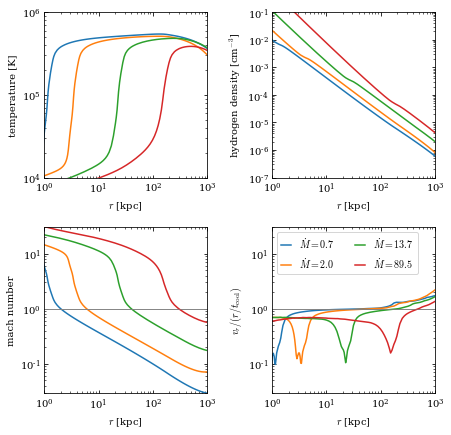

In [17]:
fig = pl.figure(figsize=(7,7))
pl.subplots_adjust(hspace=0.3,wspace=0.4)
for iPanel in range(4):
    pl.subplot(2,2,iPanel+1)
    for res in res_noAMs:
        if iPanel==0: ys = res.Ts()
        if iPanel==1: ys = res.nHs()
        if iPanel==2: ys = res.Ms()
        if iPanel==3: ys = res.t_cools() / res.t_flows()
        pl.loglog(res.Rs(),ys,label=r'$\dot{M}=%.1f$'%res.Mdot.value)
        pl.xlim(1,1000)
        pl.xlabel(r'$r$ [kpc]')
        if iPanel==0:
            pl.ylabel(r'temperature [K]')
            pl.ylim(1e4,1e6)
        if iPanel==1: 
            pl.ylabel(r'hydrogen density [cm$^{-3}$]')
            pl.ylim(1e-7,0.1)
        if iPanel==2: 
            pl.ylabel(r'mach number')
            pl.ylim(0.03,30)
            pl.axhline(1.,c='.5',lw=0.5)
        if iPanel==3: 
            pl.ylabel(r'$v_r / (r/t_{\rm cool})$')
            pl.ylim(0.03,30)
            pl.axhline(1.,c='.5',lw=0.5)
            pl.legend(loc='upper left',ncol=2,handlelength=1)
pl.savefig('output/steady_state_solutions_PLpotential.pdf',bbox_inches='tight')

### save solution

In [11]:
new_rs = 10.**np.linspace(np.log10(3),np.log10(1000),2048)*un.kpc
def cast(vals,res,new_rs=new_rs): 
    return 10.**np.interp(np.log10(new_rs.value), np.log10(res.Rs().value),np.log10(vals))
for res in res_noAMs:
    new_P2ks = cast(res.P2ks().value,res)
    new_rhos = cast(res.rhos().value,res)
    new_vs = cast(res.vs().value,res)
    new_vphis = np.zeros(new_rs.shape[0])
    vcs = res.potential.vc(new_rs)
    np.savez('output/noAM_PL_Mdot_%.4f'%res.Mdot.value,
             Rs=new_rs.value,
             rhos=new_rhos,
             P2ks=new_P2ks,
             vs=new_vs,
             g=(vcs**2/new_rs).to('cm/s**2')
            )

# Paper II figures

In [18]:
m=0 # power-law index
Rvir = 200.*un.kpc # potential.rvir() #virial radius
vc_Rvir = 100.*un.km/un.s # potential.vc(Rvir) # circular velocity at virial radius
R_phi0 = 100*Rvir # radius where Potential is zero (for calculating Bernoulli Parameter)
PLpotential = Halo.PowerLaw(m,vc_Rvir,Rvir,R_phi0)

In [19]:
R_sonics = np.array([2.,8.,50.,200.])*un.kpc         #radius of sonic point
R_min = 0.1*un.kpc           #inner radius of supersonic part of solution
R_max = 10.*Rvir              #outer radius of integration
max_step = 0.1               #resolution of solution in ln(r)

In [20]:
res_noAMs = []
for R_sonic in R_sonics:
    res_noAMs.append( CF.shoot_from_sonic_point(PLpotential,cooling,R_sonic,
                                         R_max,R_min,max_step=max_step,
                                        pr=True))


Integrated with v_c^2/c_s^2 (R_sonic) =1.000010;  maximum r=9 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.500005;  no transsonic solutions
Integrated with v_c^2/c_s^2 (R_sonic) =1.250008;  

/home/jonathan/Dropbox/jonathanmain/CGM/rapidCoolingCGM/published_pysrc/cooling_flow.py:64: RuntimeWarning: overflow encountered in double_scalars
  rho,T=e**ln_rho*un.g/un.cm**3, e**ln_T*un.K
/home/jonathan/miniconda3/lib/python3.7/site-packages/astropy/units/quantity.py:466: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/jonathan/miniconda3/lib/python3.7/site-packages/astropy/units/quantity.py:466: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/jonathan/Dropbox/jonathanmain/CGM/rapidCoolingCGM/published_pysrc/WiersmaCooling.py:46: RuntimeWarning: divide by zero encountered in log10
  return self.f_Cooling((log(T.to('K').value), log(nH.to('cm**-3').value))) * un.erg*un.cm**3/un.s
/home/jonathan/miniconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:2507: RuntimeWarning: invalid value encountere

maximum r=21 kpc; stop reason: sonic point
Integrated with v_c^2/c_s^2 (R_sonic) =1.125009;  maximum r=26 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.187508;  maximum r=1999 kpc; stop reason: max R reached
Inward integration of supersonic part reached r = 0.100 kpc
Integrated with v_c^2/c_s^2 (R_sonic) =1.000010;  maximum r=27 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.500005;  no transsonic solutions
Integrated with v_c^2/c_s^2 (R_sonic) =1.250008;  maximum r=84 kpc; stop reason: sonic point
Integrated with v_c^2/c_s^2 (R_sonic) =1.125009;  maximum r=67 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.187508;  maximum r=1999 kpc; stop reason: max R reached
Inward integration of supersonic part reached r = 0.100 kpc
Integrated with v_c^2/c_s^2 (R_sonic) =1.000010;  maximum r=91 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.500005;  no transsonic solutions
Integrated with v_c^2/c_s^2 (R_sonic) =1.25000

In [21]:
import numpy as np

In [22]:
rvir=200*un.kpc
[res.Mgas()[np.searchsorted(res.Rs(),rvir)]/(0.16*4e11*un.Msun) for res in res_noAMs] 

[<Quantity 0.22122829>,
 <Quantity 0.39183012>,
 <Quantity 0.97943972>,
 <Quantity 1.41080091>]

In [23]:
Mdots = [res.Mdot for res in res_noAMs]
print(Mdots)

[<Quantity 0.67595247 solMass / yr>, <Quantity 2.70955051 solMass / yr>, <Quantity 17.15467986 solMass / yr>, <Quantity 63.95264558 solMass / yr>]


In [24]:
cmap=pl.get_cmap('viridis')
tHubble=13.6*un.Gyr
infigfontsize = 7
from matplotlib import ticker
slantlinepropsblack = {'width':0.1,'headwidth':1.5,'headlength':2,'color':'k'}
figDir = '/home/jonathan/Dropbox/jonathanmain/CGM/rapidCoolingCGM/figures/'
ndigits = lambda f,maxdigits: ([(f*10**x)%1==0 for x in range(maxdigits)] + [True]).index(True)
intandfloatFunc = lambda x,pos=0: ('%.'+str(ndigits(x,2))+'f')%x
from numpy import log10 as log
def iround(f,modulo=1):
    if isinstance(f,np.ndarray):
        if modulo >= 1: return np.round(f/modulo).astype(int)*modulo
        else: return np.round(f/modulo).astype(int) / (1/modulo)  #patch for floating point bug
    if modulo >= 1: return int(round(f/modulo))*modulo
    else: return int(round(f/modulo)) / (1/modulo)  #patch for floating point bug

def arilogformat(x,pos=None,dollarsign=True,logbase=1,with1000=True,showHalfs=False):
    if x==0: return '0' #for symlog
    if not (showHalfs and str(x).strip('0.')[0]=='3'):
        if x==0 or iround(log(abs(x)))%logbase!=0: return ''
    if True in [abs(abs(x)-a)/a<1e-6 for a in [1,1.,3.,10,30.,100]+([],[1000])[with1000]]:
        s = '$%d$'%x
    elif True in [abs(abs(x)-a)/a<1e-6 for a in (0.03,0.01,0.3,0.1)]:
        s = '$%s$'%intandfloatFunc(x)
    else:
        s = r'$%s$'%matplotlib.ticker.LogFormatterMathtext()(x)[13:-1]
    if dollarsign: 	return s
    else: return s[1:-1]
arilogformatter = matplotlib.ticker.FuncFormatter(arilogformat)


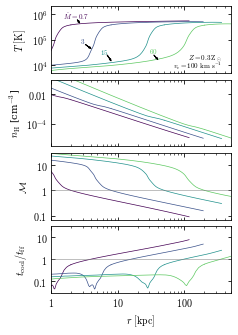

In [25]:
goods = res_noAMs
pl.figure(figsize=(fig_width_half*0.95,3.1*1.7))
pl.subplots_adjust(hspace=0.1,wspace=0.1)
axs = [pl.subplot(4,1,i+1) for i in range(4)]
for ires,res in enumerate(goods):
    c = cmap(ires/4.)
    inds1 = (res.t_cools()<tHubble) & (res.t_cools()>0) #& (res.Ts()>2e4*un.K)
    inds_subsonic   = inds1 & (res.Ms()<1)
    inds_supersonic = inds1 & (res.Ms()>1) 
    for iax,ax in enumerate(axs): 
        pl.sca(ax)
        if iax==0: ys = res.Ts()
        if iax==1: ys = res.nHs()
        if iax==2: ys = res.Ms()
        if iax==3: ys = res.tcool_to_tff()
        lw,zorder=0.7,1
        pl.plot(res.Rs()[inds_subsonic], ys[inds_subsonic],c=c,lw=lw,zorder=zorder)
        pl.plot(res.Rs()[inds_supersonic], ys[inds_supersonic],c=c,ls='-',lw=lw,zorder=zorder)
for iax,ax in enumerate(axs):
    pl.sca(ax)
    pl.loglog()
    pl.xlim(1,500.)    
    ax.xaxis.set_major_locator(matplotlib.ticker.LogLocator(base=10,numticks=4,numdecs=4))                
    ax.xaxis.set_minor_locator(matplotlib.ticker.LogLocator(base=10,subs=range(2,10),numdecs=4,numticks=20))                
    ax.yaxis.set_major_formatter(arilogformatter)            
    ax.yaxis.set_major_locator(matplotlib.ticker.LogLocator(numdecs=5,numticks=5))
#     if iax%2==1: 
#         ax.yaxis.set_label_position('right')
#         ax.yaxis.set_ticks_position('right')
#         ax.yaxis.set_ticks_position('both')
    if iax==3:
        ax.xaxis.set_major_formatter(arilogformatter)                                        
    else:
        ax.xaxis.set_major_formatter(ticker.NullFormatter()) 


    if iax==0:        
        pl.ylim(0.5e4,2e6) 
        pl.ylabel(r'$T\ [{\rm K}]$')
        pl.text(1.5,0.65e6,r'${\dot M}=0.7$',fontsize=infigfontsize,color = cmap(0.))
        pl.annotate(r'',(2.7,4.5e5),(2.5,0.6e6),arrowprops=slantlinepropsblack)            
        pl.text(2.75,7e4,r'$3$',fontsize=infigfontsize,color = cmap(1/4.))
        pl.annotate(r'',(4,4.5e4),(3.3,6.5e4),arrowprops=slantlinepropsblack)            
        pl.text(5.5,2.75e4,r'$15$',fontsize=infigfontsize,color = cmap(2/4.))
        pl.annotate(r'',(8,1.5e4),(7,2.5e4),arrowprops=slantlinepropsblack)            
        pl.text(30,3e4,r'$60$',fontsize=infigfontsize,color = cmap(3/4.))
        pl.annotate(r'',(40,1.7e4),(35,2.5e4),arrowprops=slantlinepropsblack)            
        pl.text(0.95,0.075,r'$v_{\rm c}=100\ {\rm km}\ {\rm s}^{-1}$',fontsize=infigfontsize,transform=ax.transAxes,ha='right')
        pl.text(0.95,0.2,r'$Z=0.3\,{\rm Z}_\odot$',fontsize=infigfontsize,transform=ax.transAxes,ha='right')
    if iax==1:
        pl.ylabel(r'$n_{\rm H}$ [cm$^{-3}$]')        
        pl.ylim(3e-6,0.1)                
    if iax==2:
        pl.ylabel(r'$\mathcal{M}$')
        pl.ylim(0.07,30)
        pl.axhline(1.,lw=0.5,c='0.5')        
        pl.xlabel(r'$r\ [{\rm kpc}]$')
    if iax==3:
        pl.ylabel(r'$t_{\rm cool} / t_{\rm ff}$')
        pl.ylim(0.03,30)
        pl.axhline(1.,lw=0.5,c='0.5')        
        pl.xlabel(r'$r\ [{\rm kpc}]$')
pl.savefig(figDir+'steady_state_noAM.pdf',bbox_inches='tight')

In [32]:
imp.reload(Halo)
import pdb

In [36]:
R_circ = 10.*un.kpc   #circularization radius
max_step = 0.1        #resolution of solution in ln(r)
v0 = 3*un.km/un.s     #radial velocity at circularization radius

In [38]:
res_AMs = []
for Mdot in Mdots[:2]:
    res_AMs.append(CF.shoot_from_R_circ(PLpotential,cooling,R_circ,Mdot,
                                        v0=v0,R_max=R_max,max_step=max_step,
                                        pr=True,epsilon=0.1))

Integrated with log T(R_circ)=4.50, maximum radius reached 95 kpc, stop reason: unbound


/home/jonathan/Dropbox/jonathanmain/CGM/rapidCoolingCGM/published_pysrc/cooling_flow.py:64: RuntimeWarning: overflow encountered in double_scalars
  rho,T=e**ln_rho*un.g/un.cm**3, e**ln_T*un.K
/home/jonathan/miniconda3/lib/python3.7/site-packages/astropy/units/quantity.py:466: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/jonathan/miniconda3/lib/python3.7/site-packages/astropy/units/quantity.py:466: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/jonathan/Dropbox/jonathanmain/CGM/rapidCoolingCGM/published_pysrc/WiersmaCooling.py:46: RuntimeWarning: divide by zero encountered in log10
  return self.f_Cooling((log(T.to('K').value), log(nH.to('cm**-3').value))) * un.erg*un.cm**3/un.s
/home/jonathan/miniconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:2507: RuntimeWarning: invalid value encountere

Integrated with log T(R_circ)=4.25, maximum radius reached 16 kpc, stop reason: sonic point
Integrated with log T(R_circ)=4.38, maximum radius reached 159 kpc, stop reason: sonic point
Integrated with log T(R_circ)=4.44, maximum radius reached 858 kpc, stop reason: sonic point
Integrated with log T(R_circ)=4.47, maximum radius reached 184 kpc, stop reason: unbound
Integrated with log T(R_circ)=4.45, maximum radius reached 1999 kpc, stop reason: max R reached
Integrated with log T(R_circ)=4.50, maximum radius reached 24 kpc, stop reason: unbound
Integrated with log T(R_circ)=4.25, maximum radius reached 11 kpc, stop reason: sonic point
Integrated with log T(R_circ)=4.38, maximum radius reached 52 kpc, stop reason: unbound
Integrated with log T(R_circ)=4.31, maximum radius reached 12 kpc, stop reason: sonic point
Integrated with log T(R_circ)=4.34, maximum radius reached 88 kpc, stop reason: unbound
Integrated with log T(R_circ)=4.33, maximum radius reached 194 kpc, stop reason: unbound


In [43]:
potentialAM = Halo.PowerLaw_with_AngularMomentum(m,vc_Rvir,Rvir,R_circ,R_phi0)

In [44]:
transonic = []
for R_sonic in R_sonics[2:]:
    transonic.append( CF.shoot_from_sonic_point(potentialAM,cooling,R_sonic,
                                         R_max,R_min,max_step=max_step,
                                        pr=True))


Integrated with v_c^2/c_s^2 (R_sonic) =1.000010;  maximum r=101 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.500005;  no transsonic solutions
Integrated with v_c^2/c_s^2 (R_sonic) =1.250008;  maximum r=267 kpc; stop reason: sonic point
Integrated with v_c^2/c_s^2 (R_sonic) =1.125009;  maximum r=233 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.187508;  maximum r=1192 kpc; stop reason: sonic point
Integrated with v_c^2/c_s^2 (R_sonic) =1.156258;  maximum r=497 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.171883;  maximum r=1999 kpc; stop reason: max R reached
Inward integration of supersonic part reached r = 10.000 kpc
Integrated with v_c^2/c_s^2 (R_sonic) =1.000010;  maximum r=201 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.500005;  no transsonic solutions
Integrated with v_c^2/c_s^2 (R_sonic) =1.250008;  maximum r=1549 kpc; stop reason: sonic point
Integrated with v_c^2/c_s^2 (R_sonic) =1.125009;  

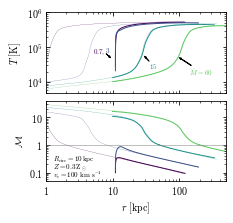

In [45]:
pl.figure(figsize=(fig_width_half*0.95,3.1))
pl.subplots_adjust(hspace=0.1,wspace=0.1)
axs = [pl.subplot(2,1,i+1) for i in range(2)]
for ires,res in enumerate(res_noAMs+res_AMs+transonic):
    noAM = res in res_noAMs
    c = cmap(ires%4/4.)
    inds1 = (res.t_cools()<tHubble) & (res.t_cools()>0) #& (res.Ts()>2e4*un.K)
    inds_subsonic   = inds1 & (res.Ms()<1)
    inds_supersonic = inds1 & (res.Ms()>1) 
    for iax,ax in enumerate(axs): 
        pl.sca(ax)
        if iax==0: ys = res.Ts()
        if iax==1: ys = res.Ms()
        if noAM: 
            lw,zorder=0.2,-1
            label = (r'$R_{\rm circ}=0$','_nolegend_')[ires%3!=0]
        else: 
            lw,zorder=1.,1
            label = (r'$R_{\rm circ}=9\,{\rm kpc}$','_nolegend_')[ires%3!=0]
        pl.plot(res.Rs()[inds_subsonic], ys[inds_subsonic],c=c,lw=lw,zorder=zorder,label=label)
        pl.plot(res.Rs()[inds_supersonic], ys[inds_supersonic],c=c,ls='-',lw=lw,zorder=zorder)
for iax,ax in enumerate(axs):
    pl.sca(ax)
    pl.loglog()
    pl.xlim(1,500.)    
    ax.xaxis.set_major_locator(matplotlib.ticker.LogLocator(base=10,numticks=4,numdecs=4))                
    ax.xaxis.set_minor_locator(matplotlib.ticker.LogLocator(base=10,subs=range(2,10),numdecs=4,numticks=20))                
    ax.yaxis.set_major_formatter(arilogformatter)            
    ax.yaxis.set_major_locator(matplotlib.ticker.LogLocator(numdecs=5,numticks=5))
    if iax==1:
        ax.xaxis.set_major_formatter(arilogformatter)                                        
    else:
        ax.xaxis.set_major_formatter(ticker.NullFormatter()) 

    if iax==0:        
        pl.ylim(0.5e4,1e6) 
        pl.ylabel(r'$T\ [{\rm K}]$')
        pl.text(5,7e4,r'$0.7,$',fontsize=infigfontsize,color = cmap(0.))
        pl.text(7.7,7e4,r'$3$',fontsize=infigfontsize,color = cmap(1/4.))
        pl.annotate(r'',(9.3,5e4),(8,6.5e4),arrowprops=slantlinepropsblack)            
        pl.text(35,2.5e4,r'$15$',fontsize=infigfontsize,color = cmap(2/4.))
        pl.annotate(r'',(30,5.5e4),(35,4e4),arrowprops=slantlinepropsblack)            
        pl.text(140,1.6e4,r'${\dot M}=60$',fontsize=infigfontsize,color = cmap(3/4.))
        pl.annotate(r'',(100,5e4),(150,3e4),arrowprops=slantlinepropsblack)            
        
    if iax==1:
        pl.ylabel(r'$\mathcal{M}$')
        pl.ylim(0.05,40)
        pl.axhline(1.,lw=0.5,c='0.5')        
        pl.xlabel(r'$r\ [{\rm kpc}]$')
        pl.text(0.04,0.05,r'$v_{\rm c}=100\ {\rm km}\ {\rm s}^{-1}$',fontsize=infigfontsize,transform=ax.transAxes)
        pl.text(0.04,0.15,r'$Z=0.3\,{\rm Z}_\odot$',fontsize=infigfontsize,transform=ax.transAxes)
        pl.text(0.04,0.25,r'$R_{\rm circ}=10\,{\rm kpc}$',fontsize=infigfontsize,transform=ax.transAxes)

pl.savefig(figDir+'steady_state_AM.pdf',bbox_inches='tight')

## save

In [47]:
pyobjDir = '/home/jonathan/Dropbox/jonathanmain/CGM/rapidCoolingCGM/pyobjs/'

In [53]:
for res in res_noAMs+res_AMs+transonic:
    str_AM = ('AM','noAM')[res in res_noAMs]
    np.savez(pyobjDir+'Mdot%.2f'%res.Mdot.value+str_AM+'.npz',
            nHs=res.nHs().to('cm**-3').value,
             Ts=res.Ts().to('K').value,
             vs=res.vs().to('km/s').value,
             rs=res.Rs().to('kpc').value,
             Mdot=res.Mdot.to('Msun/yr').value)

# for presentation

## by density

In [6]:
m=0 # power-law index
Rvir = 200.*un.kpc # potential.rvir() #virial radius
vc_Rvir = 100.*un.km/un.s # potential.vc(Rvir) # circular velocity at virial radius
R_phi0 = 100*Rvir # radius where Potential is zero (for calculating Bernoulli Parameter)
# R_sonics = np.array([8.,50.,300.])*un.kpc         #radius of sonic point
Mdots = 10.**np.arange(-1,0.55,.1)*un.Msun/un.yr
R_sonics = 10.**np.arange(1.1,3.,.1)*un.kpc         #radius of sonic point
R_min = 0.1*un.kpc           #inner radius of supersonic part of solution
R_max = 9.*Rvir              #outer radius of integration
max_step = 0.1               #resolution of solution in ln(r)
R_circ = 10.*un.kpc   #circularization radius
v0 = 3*un.km/un.s     #radial velocity at circularization radius

In [7]:
PLpotential = Halo.PowerLaw(m,vc_Rvir,Rvir,R_phi0) #for shoot from Rcirc
PLpotentialAM = Halo.PowerLaw_with_AngularMomentum(m,vc_Rvir,Rvir,R_phi0,R_circ) #for shoot from sonic point

In [9]:
ress = []
for Mdot in Mdots:
    ress.append(CF.shoot_from_R_circ(PLpotential,cooling,R_circ,Mdot,v0,R_max,max_step=max_step,pr=True,epsilon=0.03))
for R_sonic in R_sonics[:]:
    ress.append( CF.shoot_from_sonic_point(PLpotentialAM,cooling,R_sonic,R_max,R_min,max_step=max_step,pr=True))


Integrated with log T(R_circ)=4.50, maximum radius reached 48 kpc, stop reason: sonic point
Integrated with log T(R_circ)=4.75, maximum radius reached 270 kpc, stop reason: sonic point
Integrated with log T(R_circ)=4.88, maximum radius reached 95 kpc, stop reason: unbound
Integrated with log T(R_circ)=4.81, maximum radius reached 989 kpc, stop reason: lowT
Integrated with log T(R_circ)=4.84, maximum radius reached 265 kpc, stop reason: unbound
Integrated with log T(R_circ)=4.83, maximum radius reached 1799 kpc, stop reason: max R reached
Integrated with log T(R_circ)=4.50, maximum radius reached 59 kpc, stop reason: sonic point
Integrated with log T(R_circ)=4.75, maximum radius reached 683 kpc, stop reason: sonic point
Integrated with log T(R_circ)=4.88, maximum radius reached 60 kpc, stop reason: unbound
Integrated with log T(R_circ)=4.81, maximum radius reached 122 kpc, stop reason: unbound
Integrated with log T(R_circ)=4.78, maximum radius reached 1799 kpc, stop reason: max R reache

/home/jonathan/miniconda3/lib/python3.7/site-packages/astropy/units/quantity.py:466: RuntimeWarning: overflow encountered in square
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/jonathan/miniconda3/lib/python3.7/site-packages/astropy/units/quantity.py:466: RuntimeWarning: invalid value encountered in add
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Integrated with log T(R_circ)=4.34, maximum radius reached 11 kpc, stop reason: sonic point
Integrated with log T(R_circ)=4.36, maximum radius reached 11 kpc, stop reason: sonic point
Integrated with log T(R_circ)=4.37, maximum radius reached 165 kpc, stop reason: unbound
Integrated with log T(R_circ)=4.36, maximum radius reached 11 kpc, stop reason: sonic point
Integrated with log T(R_circ)=4.37, maximum radius reached 11 kpc, stop reason: sonic point
Integrated with log T(R_circ)=4.37, maximum radius reached 199 kpc, stop reason: unbound
Integrated with log T(R_circ)=4.37, maximum radius reached 12 kpc, stop reason: sonic point
Integrated with log T(R_circ)=4.37, maximum radius reached 216 kpc, stop reason: unbound
Integrated with log T(R_circ)=4.37, maximum radius reached 232 kpc, stop reason: unbound
Integrated with log T(R_circ)=4.37, maximum radius reached 242 kpc, stop reason: unbound
Integrated with log T(R_circ)=4.37, maximum radius reached 247 kpc, stop reason: unbound
Integr

/home/jonathan/miniconda3/lib/python3.7/site-packages/astropy/units/quantity.py:466: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Inward integration of supersonic part reached r = 10.000 kpc
Integrated with v_c^2/c_s^2 (R_sonic) =1.000010;  maximum r=42 kpc; stop reason: sonic point
Integrated with v_c^2/c_s^2 (R_sonic) =0.500015;  maximum r=21 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =0.750012;  maximum r=61 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =0.875011;  maximum r=410 kpc; stop reason: sonic point
Integrated with v_c^2/c_s^2 (R_sonic) =0.812512;  maximum r=128 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =0.843762;  maximum r=1799 kpc; stop reason: max R reached
Inward integration of supersonic part reached r = 10.000 kpc
Integrated with v_c^2/c_s^2 (R_sonic) =1.000010;  maximum r=1275 kpc; stop reason: sonic point
Integrated with v_c^2/c_s^2 (R_sonic) =0.500015;  maximum r=19 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =0.750012;  maximum r=38 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =0.875011;  max

Inward integration of supersonic part reached r = 10.000 kpc
Integrated with v_c^2/c_s^2 (R_sonic) =1.000010;  starts unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.500005;  no transsonic solutions
Integrated with v_c^2/c_s^2 (R_sonic) =1.250008;  maximum r=1799 kpc; stop reason: max R reached
Inward integration of supersonic part reached r = 10.000 kpc
Integrated with v_c^2/c_s^2 (R_sonic) =1.000010;  starts unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.500005;  no transsonic solutions
Integrated with v_c^2/c_s^2 (R_sonic) =1.250008;  maximum r=569 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.375006;  maximum r=679 kpc; stop reason: sonic point
Integrated with v_c^2/c_s^2 (R_sonic) =1.312507;  maximum r=1354 kpc; stop reason: sonic point
Integrated with v_c^2/c_s^2 (R_sonic) =1.281257;  maximum r=1799 kpc; stop reason: max R reached
Inward integration of supersonic part reached r = 10.000 kpc
Integrated with v_c^2/c_s^2 (R_sonic) =1.000010;  starts unbound
I

In [10]:
figDir = '/home/jonathan/Dropbox/jonathanmain/CGM/rapidCoolingCGM/figures/'
fig_size_half = [3.39375300954753, 2.09745470932262]
slantlineprops = {'color': '.5', 'headlength': 2, 'headwidth': 1.5, 'width': 0.1}
from matplotlib import ticker
from numpy import log10 as log

In [11]:
goods = [res for res in ress if res!=None]
[res.Mdot for res in goods]

[<Quantity 0.1 solMass / yr>,
 <Quantity 0.12589254 solMass / yr>,
 <Quantity 0.15848932 solMass / yr>,
 <Quantity 0.19952623 solMass / yr>,
 <Quantity 0.25118864 solMass / yr>,
 <Quantity 0.31622777 solMass / yr>,
 <Quantity 0.39810717 solMass / yr>,
 <Quantity 0.50118723 solMass / yr>,
 <Quantity 0.63095734 solMass / yr>,
 <Quantity 0.79432823 solMass / yr>,
 <Quantity 1. solMass / yr>,
 <Quantity 1.25892541 solMass / yr>,
 <Quantity 1.58489319 solMass / yr>,
 <Quantity 1.99526231 solMass / yr>,
 <Quantity 2.48682175 solMass / yr>,
 <Quantity 4.02447256 solMass / yr>,
 <Quantity 5.66920804 solMass / yr>,
 <Quantity 7.75046956 solMass / yr>,
 <Quantity 10.16155604 solMass / yr>,
 <Quantity 12.89331734 solMass / yr>,
 <Quantity 16.07053749 solMass / yr>,
 <Quantity 20.07022241 solMass / yr>,
 <Quantity 26.16877862 solMass / yr>,
 <Quantity 31.88752255 solMass / yr>,
 <Quantity 38.66859669 solMass / yr>,
 <Quantity 49.50431702 solMass / yr>,
 <Quantity 63.33564025 solMass / yr>,
 <Quant

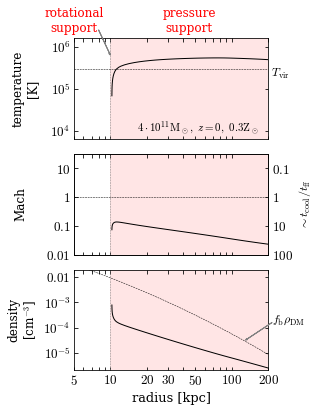

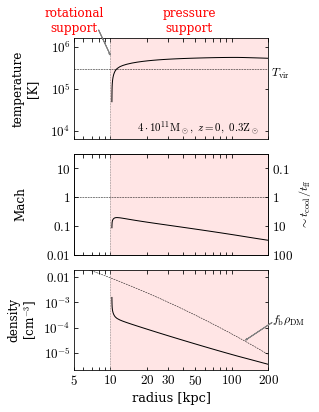

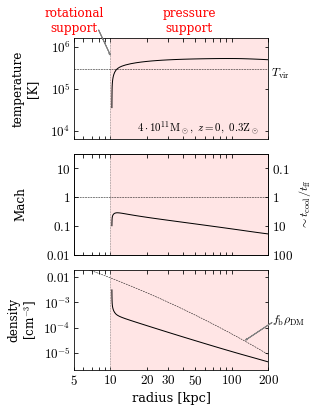

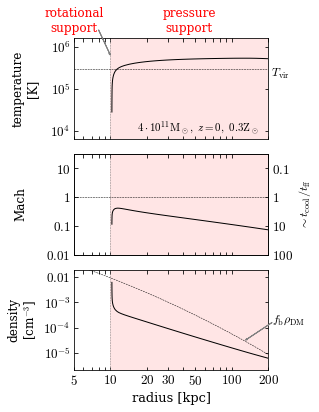

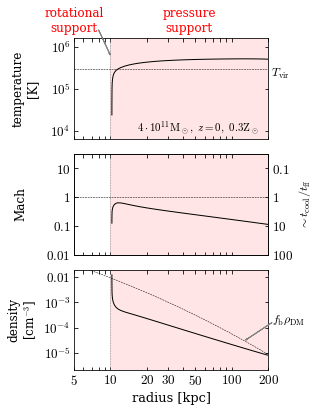

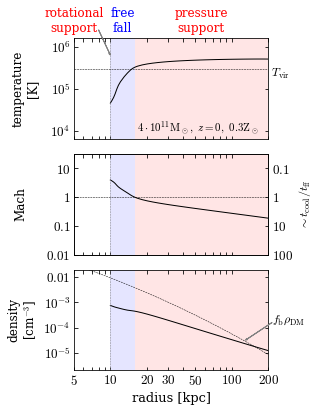

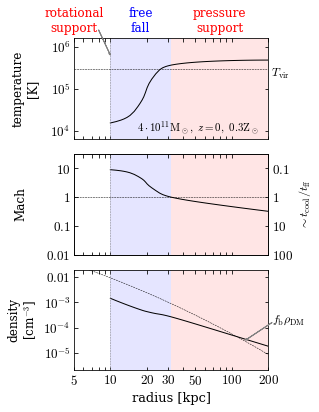

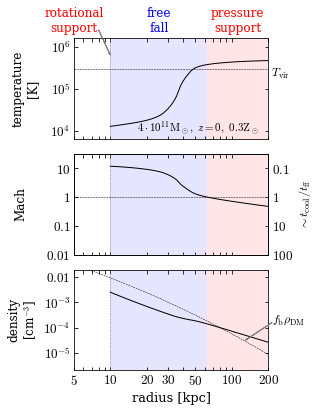

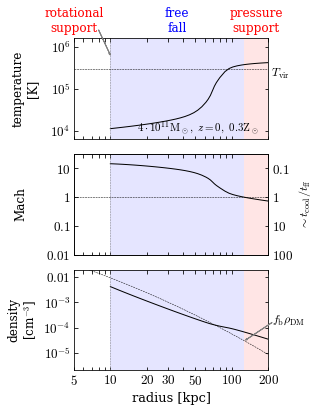

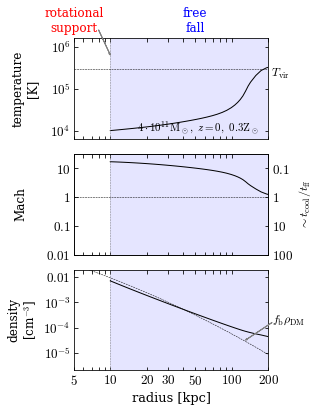

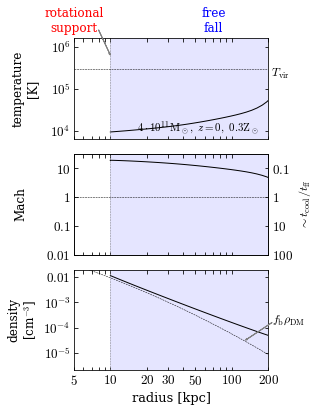

In [175]:
fs=12; alpha=0.1
for ifig,res in enumerate(goods[::3]+[goods[-1]]):
    f=pl.figure(figsize=(4.5,5.8))
    pl.subplots_adjust(hspace=0.15,top=0.92,left=0.25,right=0.85)
    for iPanel in range(3):
        c = 'k'
        ax = pl.subplot(3,1,iPanel+1)
        if iPanel==0: ys = res.Ts()
        if iPanel==1: ys = res.Ms()
        if iPanel==2: ys = res.nHs()
        if iPanel==3: ys = res.Ks()
        pl.plot(res.Rs(), log(ys.value),c=c,ls='-',lw=1)
        pl.axvline(R_circ.value,c='.5',lw=0.5,ls='--')
        xls = 5,200
        pl.xlim(*xls)

        pl.semilogx()
        ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
#         ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
        pl.yticks(range(-5,7),[r'$10^{-5}$',r'$10^{-4}$',r'$10^{-3}$',r'$0.01$',r'$0.1$',r'$1$',r'$10$',r'$100$',r'$10^{3}$',r'$10^{4}$',r'$10^{5}$',r'$10^{6}$'])
#         ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos: r'$%d$'%x))  
        if iPanel==2:
            pl.xlabel('radius [kpc]',fontsize=13)        
            ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos: (r'$%d$'%x,'')[x in (4,6,7,8,9,40,60,70,80,90)]))    
        else:
            ax.xaxis.set_major_formatter(ticker.NullFormatter())
        if res.R_sonic()!=None:
            x0 = res.R_sonic().value[0]
            pl.fill_between(np.array([R_circ.value,x0]),np.array([-10,-10]),np.array([10,10]),facecolor='b',alpha=alpha,zorder=-100)
        else: 
            x0 = R_circ.value        
        if x0<xls[1]:
            pl.fill_between(np.array([x0,xls[1]]),np.array([-10,-10]),np.array([10,10]),facecolor='r',alpha=alpha,zorder=-100)

        if iPanel==0:
            pl.text(-0.25,0.5,'temperature\n[K]',fontsize=fs,ha='center',va='center',rotation=90,transform=ax.transAxes)
            pl.text(0.95,0.075,r'$4\cdot 10^{11}{\rm M}_\odot,\ z=0,\ 0.3{\rm Z}_\odot$',ha='right',fontsize=fs-1,transform=ax.transAxes)
            pl.ylim(3.8,6.2) 
            pl.text(5,6.35,'rotational\nsupport',color='r',ha='center',fontsize=fs)
            pl.annotate(r'',(10,5.8),(8,6.4),arrowprops=slantlineprops)
            pl.axhline(log(potential.dk14.Tvir().value),c='k',lw=0.5,ls='--')
            pl.text(210,log(potential.dk14.Tvir().value)-0.1,r'$T_{\rm vir}$',va='center',fontsize=fs)

            if res.R_sonic()!=None:
                pl.text((x0*R_circ.value)**0.5,6.35,'free\nfall',color='b',ha='center',fontsize=fs)
            if x0<xls[1]:
                pl.text((x0*xls[1])**0.5,6.35,'pressure\nsupport',color='r',ha='center',fontsize=fs)
        if iPanel==1: 
            pl.ylabel('Mach\n',fontsize=fs)
            pl.ylim(-2,1.5)
            pl.axhline(0.,c='k',lw=0.5,ls='--')  
            ax2 = pl.twinx()
            pl.ylabel(r'$\sim t_{\rm cool}/t_{\rm ff}$',fontsize=fs)
            pl.yticks(range(-5,7),[r'$10^{-5}$',r'$10^{-4}$',r'$10^{-3}$',r'$0.01$',r'$0.1$',r'$1$',r'$10$',r'$100$',r'$10^{3}$',r'$10^{4}$',r'$10^{5}$',r'$10^{6}$'])
            pl.ylim(2,-1.5)                      
            ax2.tick_params(axis='both',labelsize=13)
        if iPanel==2:
            pl.ylabel('density\n[cm$^{-3}$]',fontsize=fs)
            pl.ylim(-5.7,-1.7)  
            rs = 10.**np.arange(log(xls[0]),log(xls[1]),.01)*un.kpc
            pl.plot(rs,log(0.7*potential.dk14.rho_b(rs).value/cons.m_p.to('g').value),c='k',lw=0.5,ls='--')
            pl.text(215,-3.8,r'$f_{\rm b}\rho_{\rm DM}$',fontsize=fs)
            pl.annotate(r'',(130,-4.5),(215,-3.8),arrowprops=slantlineprops)
        if iPanel==3:
            pl.ylabel('entropy\n[keV cm$^{-2}$]',fontsize=fs)
            pl.ylim(-1.5,2.5)
        ax.xaxis.set_major_locator(ticker.LogLocator(subs=range(1,10)))
        ax.tick_params(axis='both',labelsize=13)
    pl.savefig(figDir+'steady_state_presentation_D%05d.pdf'%ifig)

## by M_halo

## research statement


In [1]:
import sys,os
from astropy import units as un, constants as cons
sys.path.append('/home/jonathan/Dropbox/jonathanmain/CGM/rapidCoolingCGM/published_pysrc')
os.chdir('/home/jonathan/Dropbox/jonathanmain/CGM/rapidCoolingCGM/published_pysrc')
import cooling_flow as CF

In [2]:
import HaloPotential as Halo
lMhalo = 11.5
z = 0.
Mgalaxy = Halo.MgalaxyBehroozi(lMhalo, z)
potential = Halo.DK14_NFW(lMhalo,Mgalaxy,z)

In [3]:
import WiersmaCooling as Cool
Z2Zsun = 1/3.
z = 0.
cooling = Cool.Wiersma_Cooling(Z2Zsun,z)

/home/jonathan/Dropbox/jonathanmain/CGM/rapidCoolingCGM/published_pysrc/WiersmaCooling.py:40: RuntimeWarning: invalid value encountered in log10
  vals = log(self.LAMBDA(X*un.K,Y*un.cm**-3).value)


In [4]:
import imp,numpy as np
import pylab as pl
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rc('font', family='serif', size=10)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['ytick.right'] = True
fig_width_half = 3.4

In [5]:
m=-0.14 # power-law index
Rvir = 225.*un.kpc # potential.rvir() #virial radius
vc_Rvir = 110.*un.km/un.s # potential.vc(Rvir) # circular velocity at virial radius
R_phi0 = 100*Rvir # radius where Potential is zero (for calculating Bernoulli Parameter)
# R_sonics = np.array([8.,50.,300.])*un.kpc         #radius of sonic point
Mdot = 2*un.Msun/un.yr
R_sonic = 0.75*Rvir         #radius of sonic point
R_min = 0.1*un.kpc           #inner radius of supersonic part of solution
R_max = 9.*Rvir              #outer radius of integration
max_step = 0.1               #resolution of solution in ln(r)
R_circ = 0.05*Rvir   #circularization radius
v0 = 3*un.km/un.s     #radial velocity at circularization radius

In [6]:
PLpotential = Halo.PowerLaw(m,vc_Rvir,Rvir,R_phi0) #for shoot from Rcirc
PLpotentialAM = Halo.PowerLaw_with_AngularMomentum(m,vc_Rvir,Rvir,R_phi0,R_circ) #for shoot from sonic point

In [7]:
res_hot = CF.shoot_from_R_circ(PLpotential,cooling,R_circ,Mdot,v0,R_max,max_step=max_step,pr=True,epsilon=0.03)
res_cold = CF.shoot_from_sonic_point(PLpotentialAM,cooling,R_sonic,R_max,R_min,max_step=max_step,pr=True)


/home/jonathan/Dropbox/jonathanmain/CGM/rapidCoolingCGM/published_pysrc/cooling_flow.py:64: RuntimeWarning: overflow encountered in double_scalars
  rho,T=e**ln_rho*un.g/un.cm**3, e**ln_T*un.K
/home/jonathan/miniconda3/lib/python3.7/site-packages/astropy/units/quantity.py:466: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/jonathan/miniconda3/lib/python3.7/site-packages/astropy/units/quantity.py:466: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/jonathan/Dropbox/jonathanmain/CGM/rapidCoolingCGM/published_pysrc/WiersmaCooling.py:46: RuntimeWarning: divide by zero encountered in log10
  return self.f_Cooling((log(T.to('K').value), log(nH.to('cm**-3').value))) * un.erg*un.cm**3/un.s
/home/jonathan/miniconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:2507: RuntimeWarning: invalid value encountere

Integrated with log T(R_circ)=4.50, maximum radius reached 24 kpc, stop reason: sonic point
Integrated with log T(R_circ)=4.75, maximum radius reached 216 kpc, stop reason: unbound
Integrated with log T(R_circ)=4.62, maximum radius reached 61 kpc, stop reason: sonic point
Integrated with log T(R_circ)=4.69, maximum radius reached 206 kpc, stop reason: sonic point
Integrated with log T(R_circ)=4.72, maximum radius reached 2024 kpc, stop reason: max R reached
Integrated with v_c^2/c_s^2 (R_sonic) =1.000010;  maximum r=259 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.500005;  no transsonic solutions
Integrated with v_c^2/c_s^2 (R_sonic) =1.250008;  maximum r=514 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.375006;  maximum r=1227 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.437506;  maximum r=2024 kpc; stop reason: max R reached


/home/jonathan/miniconda3/lib/python3.7/site-packages/astropy/units/quantity.py:466: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Inward integration of supersonic part reached r = 11.250 kpc


In [8]:
figDir = '/home/jonathan/Dropbox/jonathanmain/doc/Applications2019/'
fig_size_half = [3.39375300954753, 2.09745470932262]
slantlineprops = {'color': '.5', 'headlength': 2, 'headwidth': 1.5, 'width': 0.1}
from matplotlib import ticker
from numpy import log10 as log

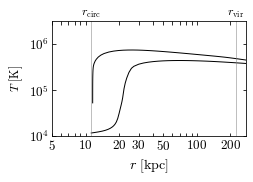

In [9]:
fs=12; alpha=0.1
f=pl.figure(figsize=(4.5,2.))
pl.subplots_adjust(hspace=0.15,top=0.92,left=0.25,right=0.85)
c = 'k'
ax = pl.subplot(111)
for res in (res_cold,res_hot):
    ys = res.Ts()
    pl.plot(res.Rs(), log(ys.value),c=c,ls='-',lw=1)
pl.axvline(R_circ.value,c='.5',lw=0.5,ls='-')
pl.axvline(Rvir.value,c='.5',lw=0.5,ls='-')
pl.text(R_circ.value,6.525,r'$r_{\rm circ}$',va='bottom',ha='center',fontsize=fs)
pl.text(Rvir.value,6.525,r'$r_{\rm vir}$',va='bottom',ha='center',fontsize=fs)
xls = 5,280
pl.xlim(*xls)
pl.semilogx()
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
pl.yticks(np.arange(4,7.1),[r'$10^4$',r'$10^5$',r'$10^6$',r'$10^7$'])
pl.xlabel(r'$r\ [{\rm kpc}]$',fontsize=fs+2)        
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos: (r'$%d$'%x,'')[x in (4,6,7,8,9,40,60,70,80,90)]))    
pl.ylabel(r'$T\ [{\rm K}]$',fontsize=fs)
pl.ylim(4,6.5)
ax.xaxis.set_major_locator(ticker.LogLocator(subs=range(1,10)))
ax.tick_params(axis='both',labelsize=13)
pl.savefig(figDir+'steady_state_statement2.pdf',bbox_inches='tight')

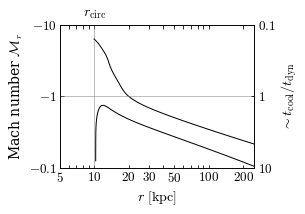

In [19]:
fs=12; alpha=0.1
f=pl.figure(figsize=(4.5,2.5))
pl.subplots_adjust(hspace=0.15,top=0.92,left=0.25,right=0.85)
c = 'k'
ax = pl.subplot(111)
for res in (res_cold,res_hot):
    ys = res.Ms()
    pl.plot(res.Rs(), log(ys.value),c=c,ls='-',lw=1)
pl.axvline(R_circ.value,c='.5',lw=0.5,ls='-')
pl.text(R_circ.value,1.05,r'$r_{\rm circ}$',va='bottom',ha='center',fontsize=fs+2)
xls = 5,250
pl.xlim(*xls)
pl.semilogx()
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
pl.yticks(range(-5,7),[r'$-10^{-5}$',r'$-10^{-4}$',r'$-10^{-3}$',r'$-0.01$',r'$-0.1$',r'$-1$',r'$-10$',r'$-100$',r'$-10^{3}$',r'$-10^{4}$',r'$-10^{5}$',r'$-10^{6}$'])
pl.xlabel(r'$r\ [{\rm kpc}]$',fontsize=fs+2)        
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos: (r'$%d$'%x,'')[x in (4,6,7,8,9,40,60,70,80,90)]))    
pl.ylabel(r'Mach number $\mathcal{M}_r$',fontsize=fs+2)
pl.ylim(-1,1.)
pl.axhline(0.,c='.5',lw=0.5,ls='-')  
ax2 = pl.twinx()
pl.ylabel(r'$\sim t_{\rm cool}/t_{\rm dyn}$',fontsize=fs+2)
pl.yticks(range(-5,7),[r'$10^{-5}$',r'$10^{-4}$',r'$10^{-3}$',r'$0.01$',r'$0.1$',r'$1$',r'$10$',r'$100$',r'$10^{3}$',r'$10^{4}$',r'$10^{5}$',r'$10^{6}$'])
pl.ylim(1,-1.)                      
ax2.tick_params(axis='both',labelsize=13)
ax.xaxis.set_major_locator(ticker.LogLocator(subs=range(1,10)))
ax.tick_params(axis='both',labelsize=13)
pl.savefig(figDir+'steady_state_statement.pdf',bbox_inches='tight')

# 2D solutions

In [34]:
from numpy import log as ln

In [30]:
vc = vc_Rvir

In [37]:
r = 10**np.arange(0.01,2.,.01)*un.kpc
mu = np.linspace(-0.99,0.99,201) # cos theta
r_grid, mu_grid = np.meshgrid(r.value,mu)
r_grid = r_grid*un.kpc
Phi = vc**2 * (ln(r_grid/R_circ) + R_circ**2 / (2*r_grid**2*(1-mu_grid**2)) - 0.5)